In [1]:
from CollectData import CollectData

In [2]:
# Instanciamos el objeto CollectData
collect_data = CollectData()

# Cargamos todos los datos
collect_data.load_data()

# Cogemos las listas con los diferentes preprocesos
# Lista sin preproceso
list_raw = collect_data.lista_raw
# Lista de datos filtrados
list_filtered = collect_data.lista_filtered
# Lista de datos algoritmo ASR
list_asr = collect_data.lista_asr
# Lista ICA removed not brain sources
list_ica = collect_data.lista_ica_raw_rem
# Guardamos el nombre de los canales
chan_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4',\
              'O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
#chan_names = list(collect_data.chan_names)
# Guardamos la frecuencia de muestreo
sfreq = 128

C:\Users\SandraGP\Desktop\trabajo\Proyecto_Balladeer\DATA\RawData
C:\Users\SandraGP\Desktop\trabajo\Proyecto_Balladeer\DATA\DatosFiltrados
C:\Users\SandraGP\Desktop\trabajo\Proyecto_Balladeer\DATA\DatosFiltradosASR
C:\Users\SandraGP\Desktop\trabajo\Proyecto_Balladeer\DATA\DatosICAremoved


Nos damos cuenta de los individuos de la lista raw no están en el orden adecuado. Pensaba que el error iba a ser peor, pero los individuos estaban desordenados dentro de las etiquetas bien puestas, así que no es para tato en relación a los resultados de los modelos.
También hemos comprobado que las listas filtered, asr e ica estén en el mismo orden y sí, soo estaba mal el raw.

In [3]:
# cada lis_x contiene 121 elementos que son los individuos
# cada individuo tiene un array de dim (time X n_channels)
print(list_raw[58].shape, list_filtered[58].shape)
#58,59,60,118,119,120 únicas posiciones que coinciden

(17562, 19) (17562, 19)


In [4]:
# creamos un diccionario con las posiciones key=idx_nuevo, value=idx_viejo
dict_filt_raw = {}
for i in range(121):
    for j in range(121):
        if list_filtered[i].shape == list_raw[j].shape:
            dict_filt_raw[i] = j

In [5]:
# Mostramos las posiciones nuevas y las viejas
#dict_filt_raw

In [6]:
# Reordenamos la lista con los valores raw
reordered_raw_list = [None] * len(list_raw)
for new_index, current_index in dict_filt_raw.items():
    reordered_raw_list[new_index] = list_raw[current_index]

In [7]:
# Comprobamos que esté bien
dict_filt_raw_reord = {}
for i in range(121):
    for j in range(121):
        if list_filtered[i].shape == reordered_raw_list[j].shape:
            dict_filt_raw_reord[i] = j

In [8]:
# mostramos el nuevo dict para comprobar que esté bien
#dict_filt_raw_reord

Una vez ordenados los individuos vamos a calcular el SNR medio por cada individuo

### SNR con la media de todos los individuos

In [9]:
import numpy as np

def calculate_mean_snr(raw_list, filtered_list):
    """
    Calculate the mean and standard deviation of the Signal-to-Noise Ratio (SNR)
    across multiple EEG samples.

    Parameters:
    raw_list (list): A list of numpy arrays, each with dimensions (timepoints x channels) representing raw EEG data.
    filtered_list (list): A list of numpy arrays, each with dimensions (timepoints x channels) representing filtered EEG data.

    Returns:
    mean_snr (float): The mean SNR across all samples.
    std_snr (float): The standard deviation of the SNR across all samples.
    """
    
    # Initialize a list to store SNR values for each sample
    snr_list = []

    # Loop through each pair of raw and filtered samples
    for raw, filtered in zip(raw_list, filtered_list):
        # Calculate the removed noise
        removed_noise = raw - filtered

        # Calculate the power of the filtered signal
        signal_power = np.mean(np.square(filtered))

        # Calculate the power of the removed noise
        noise_power = np.mean(np.square(removed_noise))

        # Compute the SNR for the current sample
        snr = signal_power / noise_power

        # Convert SNR to decibels (dB)
        snr_db = 10 * np.log10(snr)

        # Append the SNR (in dB) to the list
        snr_list.append(snr_db)

    # Calculate the mean and standard deviation of the SNR across all samples
    mean_snr = np.mean(snr_list)
    std_snr = np.std(snr_list)

    return mean_snr, std_snr

# Example usage
if __name__ == "__main__":
    # Create example raw and filtered lists
    raw_list = [np.random.randn(1000, 32) for _ in range(10)]  # 10 samples, each with 1000 timepoints and 32 channels
    filtered_list = [raw - np.random.randn(1000, 32) * 0.1 for raw in raw_list]  # Simulate filtered data

    mean_snr, std_snr = calculate_mean_snr(raw_list, filtered_list)

    print("Mean SNR (dB):", mean_snr)
    print("STD of SNR (dB):", std_snr)


Mean SNR (dB): 20.042081159828264
STD of SNR (dB): 0.034028248786658576


In [10]:
mean_snr, std_snr = calculate_mean_snr(reordered_raw_list, list_filtered)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

Mean SNR (dB): 1.1093923108675598
STD of SNR (dB): 3.024835308949521


In [11]:
mean_snr, std_snr = calculate_mean_snr(reordered_raw_list, list_asr)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

Mean SNR (dB): -3.4435343402755185
STD of SNR (dB): 2.7346680500472647


In [12]:
mean_snr, std_snr = calculate_mean_snr(reordered_raw_list, list_ica)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

Mean SNR (dB): -6.088892611177509
STD of SNR (dB): 2.614679553319727


In [13]:
mean_snr, std_snr = calculate_mean_snr(list_filtered, list_asr)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

C:\Users\SandraGP\AppData\Local\Temp\ipykernel_36556\3130376034.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  snr = signal_power / noise_power


Mean SNR (dB): inf
STD of SNR (dB): nan


c:\Software\anaconda3\envs\features-eeg\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [14]:
mean_snr, std_snr = calculate_mean_snr(list_filtered, list_ica)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

Mean SNR (dB): -1.937629281950341
STD of SNR (dB): 3.889991957572264


In [15]:
mean_snr, std_snr = calculate_mean_snr(list_asr, list_ica)
print("Mean SNR (dB):", mean_snr)
print("STD of SNR (dB):", std_snr)

Mean SNR (dB): 3.8472976589315655
STD of SNR (dB): 4.250472764187619


### SNR con la media solo de los canales. 121 muestras

In [16]:
import numpy as np

def calculate_snr(raw_eeg, cleaned_eeg):
    """
    Calculate the Signal-to-Noise Ratio (SNR) for an EEG signal.

    Parameters:
    raw_eeg (numpy.ndarray): Raw EEG signal with dimensions (channels x timepoints).
    cleaned_eeg (numpy.ndarray): Cleaned EEG signal with dimensions (channels x timepoints).

    Returns:
    snr (numpy.ndarray): SNR for each channel in linear scale.
    snr_db (numpy.ndarray): SNR for each channel in decibels (dB).
    average_snr_db (float): Average SNR across all channels in decibels (dB).
    """
    
    # Step 1: Calculate the removed noise
    removed_noise = raw_eeg - cleaned_eeg

    # Step 2: Calculate the power of the cleaned signal
    signal_power = np.mean(np.square(cleaned_eeg), axis=1)

    # Step 3: Calculate the power of the removed noise
    noise_power = np.mean(np.square(removed_noise), axis=1)

    # Step 4: Compute the SNR
    snr = signal_power / noise_power

    # Step 5: Convert SNR to decibels (dB)
    snr_db = 10 * np.log10(snr)

    # Step 6: Calculate the average SNR across all channels in dB
    average_snr_db = np.mean(snr_db)
    average_snr = np.mean(snr)
    average_noise = np.mean(noise_power)

    return snr, snr_db, average_snr_db, average_snr, average_noise

# Example usage
if __name__ == "__main__":
    # Assuming you have loaded your EEG data as numpy arrays
    # raw_eeg = np.load("path_to_raw_eeg.npy")
    # cleaned_eeg = np.load("path_to_cleaned_eeg.npy")

    # Example arrays for demonstration (replace with actual data)
    raw_eeg = np.random.randn(32, 1000)  # 32 channels, 1000 timepoints
    cleaned_eeg = raw_eeg - np.random.randn(32, 1000) * 0.1  # Simulate some cleaning

    snr, snr_db, average_snr_db, average_snr, removed_noise = calculate_snr(raw_eeg, cleaned_eeg)

    print("SNR (linear, per channel):", snr)
    print("SNR (dB, per channel):", snr_db)
    print("Average SNR (dB):", average_snr_db)
    print("Average SNR:", average_snr)
    print("Removed noise:", removed_noise)

SNR (linear, per channel): [ 91.54258659  95.59809711  98.04571413  88.44690442  93.28966677
 102.08547625 101.41519187 101.19014823 101.76960311  87.87125745
 101.38336232  88.44973852 108.0309794  102.6816298   96.7844875
  99.35230106  97.53856435 100.14262727  95.6661108  100.98861184
 101.99979291  97.9224683   97.0358221  102.4168248  101.58303398
 101.95015464 108.56899509  97.68756368 107.45851673  91.14099801
  86.39624718  97.71226106]
SNR (dB, per channel): [19.6162318  19.80449248 19.91428614 19.46682638 19.69833542 20.08963959
 20.06103017 20.05138232 20.07618081 19.43846841 20.0596669  19.46696553
 20.33548313 20.11492753 19.85805755 19.9717793  19.89176359 20.00618981
 19.80758119 20.04272403 20.0859929  19.90882352 19.8693209  20.10371307
 20.0682118  20.08387889 20.35705818 19.89839278 20.31240842 19.5971378
 19.36494878 19.89949063]
Average SNR (dB): 19.916293429350514
Average SNR: 98.25455428991143
Removed noise: 0.010213958751051754


In [17]:
# creamos listas con los valores de cada individuo para pintar su snr

# RUIDO ELIMINADO
rm_ns_channel_filt = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_filtered[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    rm_ns_channel_filt.append(rm_ns)
    
rm_ns_channel_asr = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_asr[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    rm_ns_channel_asr.append(rm_ns)

rm_ns_channel_ica = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_ica[s])
    snr, snr_db, average_snr_db,average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    rm_ns_channel_ica.append(rm_ns)

# SNR 
snr_channel_filt = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_filtered[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_channel_filt.append(average_snr)
    
snr_channel_asr = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_asr[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_channel_asr.append(average_snr)

snr_channel_ica = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_ica[s])
    snr, snr_db, average_snr_db,average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_channel_ica.append(average_snr)

# SNR dB
snr_db_channel_filt = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_filtered[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_db_channel_filt.append(average_snr_db)
    
snr_db_channel_asr = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_asr[s])
    snr, snr_db, average_snr_db, average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_db_channel_asr.append(average_snr_db)

snr_db_channel_ica = []
for s in range(121):
    raw_eeg = np.transpose(reordered_raw_list[s])
    cleaned_eeg = np.transpose(list_ica[s])
    snr, snr_db, average_snr_db,average_snr, rm_ns = calculate_snr(raw_eeg, cleaned_eeg)
    snr_db_channel_ica.append(average_snr_db)

In [18]:
# removed noise
subj_ns_filt_arr = np.array(rm_ns_channel_filt)
subj_ns_asr_arr = np.array(rm_ns_channel_asr)
subj_ns_ica_arr = np.array(rm_ns_channel_ica)

# snr
subj_snr_filt_arr = np.array(snr_channel_filt)
subj_snr_asr_arr = np.array(snr_channel_asr)
subj_snr_ica_arr = np.array(snr_channel_ica)

# snd db
subj_snrdb_filt_arr = np.array(snr_db_channel_filt)
subj_snrdb_asr_arr = np.array(snr_db_channel_asr)
subj_snrdb_ica_arr = np.array(snr_db_channel_ica)

In [19]:
import matplotlib.pyplot as plt

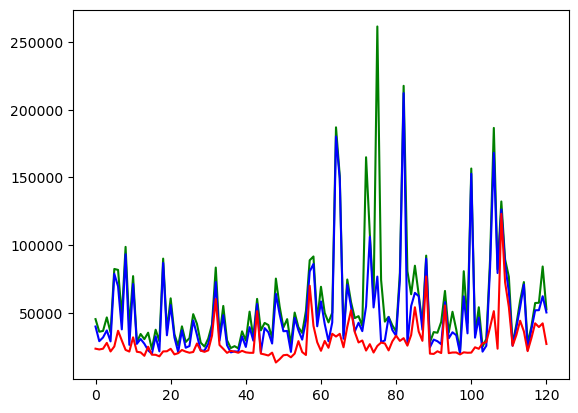

In [20]:
x = np.arange(121)
y1 = subj_ns_filt_arr
y2 = subj_ns_asr_arr
y3 = subj_ns_ica_arr

plt.plot(x,y3,color='green')
plt.plot(x,y2,color='blue')
plt.plot(x,y1,color='red')


plt.show()

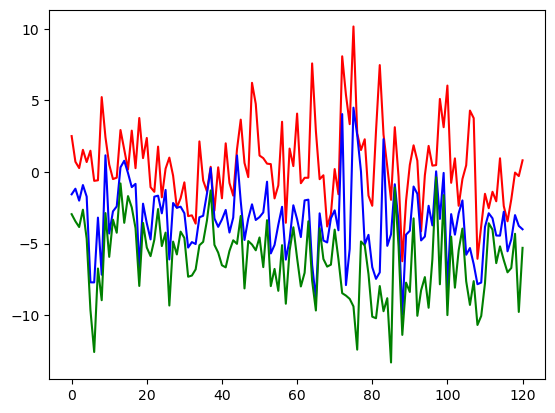

In [21]:
x = np.arange(121)
y1 = subj_snrdb_filt_arr
y2 = subj_snrdb_asr_arr
y3 = subj_snrdb_ica_arr

plt.plot(x,y1,color='red')
plt.plot(x,y2,color='blue')
plt.plot(x,y3,color='green')
plt.show()

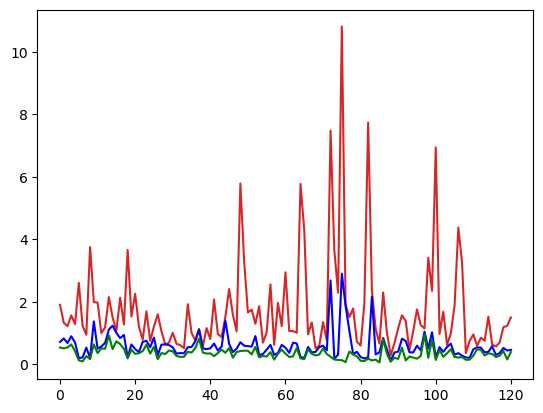

In [22]:
x = np.arange(121)
y1 = subj_snr_filt_arr
y2 = subj_snr_asr_arr
y3 = subj_snr_ica_arr

plt.plot(x,y1,color='tab:red')
plt.plot(x,y2,color='blue')
plt.plot(x,y3,color='green')
plt.show()

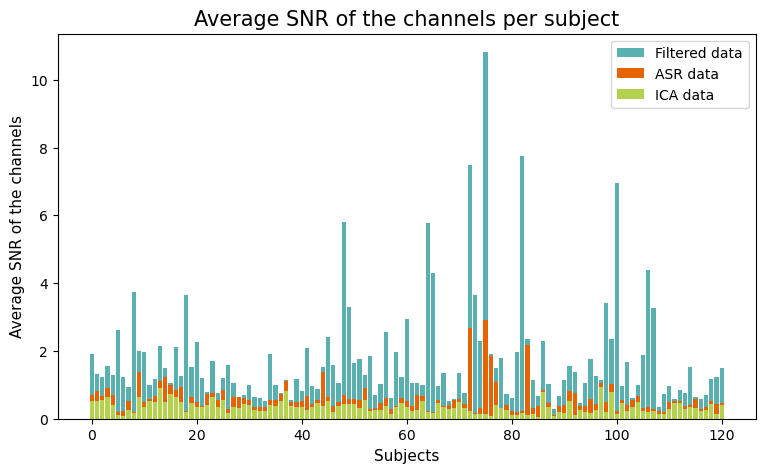

In [31]:
plt.figure(figsize=(9, 5))
x = np.arange(121)
y1 = subj_snr_filt_arr 
y2 = subj_snr_asr_arr 
y3 = subj_snr_ica_arr 

plt.bar(x,y1,color='#5AB0B0', label='Filtered data')
plt.bar(x,y2,color='#E56300', label='ASR data')
plt.bar(x,y3,color='#B4D24D', label='ICA data')

plt.ylabel('Average SNR of the channels', fontsize=11)
plt.xlabel('Subjects', fontsize=11)
plt.title('Average SNR of the channels per subject', fontsize=15)

plt.legend()
plt.show()

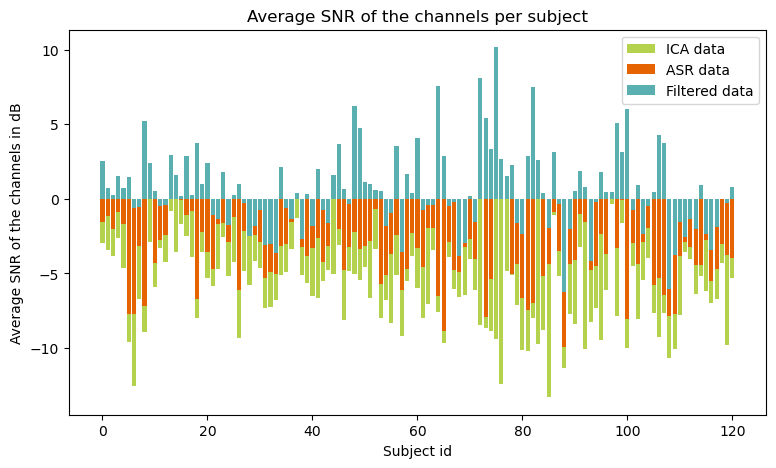

In [27]:
plt.figure(figsize=(9, 5))
x = np.arange(121)
y1 = subj_snrdb_filt_arr 
y2 = subj_snrdb_asr_arr 
y3 = subj_snrdb_ica_arr 


plt.bar(x,y3,color='#B4D24D', label='ICA data')

plt.bar(x,y2,color='#E56300', label='ASR data')
plt.bar(x,y1,color='#5AB0B0', label='Filtered data')


plt.ylabel('Average SNR of the channels in dB')
plt.xlabel('Subject id')
plt.title('Average SNR of the channels per subject')


plt.legend()
plt.show()
#'#EBD167''#5785EB' '#EB6F57

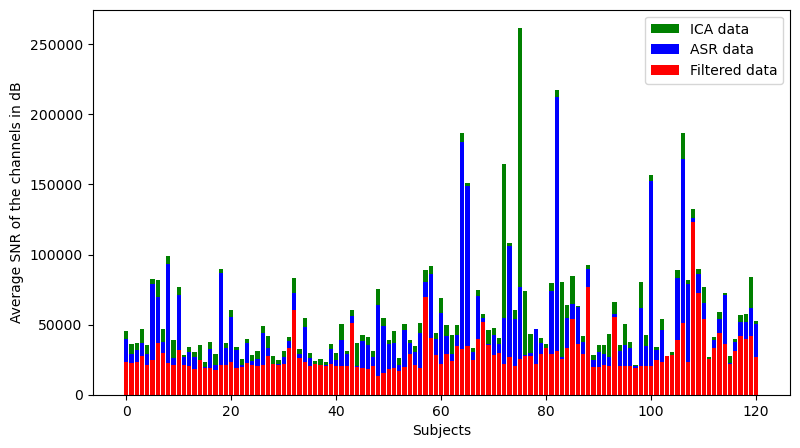

In [107]:
plt.figure(figsize=(9, 5))
x = np.arange(121)
y1 = subj_ns_filt_arr 
y2 = subj_ns_asr_arr 
y3 = subj_ns_ica_arr 


plt.bar(x,y3,color='green', label='ICA data')
plt.bar(x,y2,color='blue', label='ASR data')
plt.bar(x,y1,color='red', label='Filtered data')


plt.ylabel('Average SNR of the channels in dB')
plt.xlabel('Subjects')


plt.legend()
plt.show()

### Para mañana tengo que revisar el código y si es necesario mejorar la función. Además, tengo que mirar lo del SNR negativo para ver si tiene sentido